
# Project: Medical Appointment Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set presents the data of a group of patients who have already booked an appointment to go to the doctor, but there are some of them who attended on time and others did not attend on time, this study depends on showing the reasons for some not attending on time if the reason depend on Gender , or if Who took Scholarship who didn't attend , many questions are asked to common reason for people how didn't attend the appointment 


In [1]:
# First of all we should import the necessary library that we be used along the analysis steps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section we will upload the data in pandas dataframe and explore the dataset to check for what we can do to clean it 

### General Properties

#### Let's load our data in pandas dataframe

In [2]:
appoinment_df = pd.read_csv("KaggleV2-May-2016.csv")
# print the first 5 rows of the dataframe to check it was loaded correctly 
appoinment_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### showing some information about the dataset it will help us to know if there a null values and what datatypes of each column

In [3]:
appoinment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### What is the deminsion of our dataset 

In [4]:
appoinment_df.shape

(110527, 14)

### Data Cleaning 
> In this section we will discover deeper in data and clean it 

#### Let's check if there is a null values 

In [5]:
appoinment_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Let's see the dupplication in the dataframe

In [6]:
appoinment_df.duplicated().sum()

0

#### What about duplication in Patient Id only 

In [7]:
appoinment_df["PatientId"].duplicated().sum()


48228

#### so if there is a duplication in patient id let's see when we group it with the result of going to the appointment

In [8]:
appoinment_df[["PatientId","No-show"]].duplicated().sum()

38710

#### So all theses duplicated values we need to drop it

In [9]:
 appoinment_df.drop_duplicates(["PatientId","No-show"],inplace = True)

#### Now let's check about the duplication 

In [10]:
appoinment_df[["PatientId","No-show"]].duplicated().sum()

0

#### Removing Negative Numbers

In [11]:
appoinment_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.181700e+04,7.181700e+04,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000
mean,1.466294e+14,5.666495e+06,36.526978,0.095534,0.195065,0.070958,0.025036,0.020135,0.335561
std,2.544927e+14,7.313144e+04,23.378518,0.293954,0.396254,0.256757,0.156235,0.155337,0.472190
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175978e+12,5.631622e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.189717e+13,5.672884e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.457487e+13,5.716568e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
# from the description function and the histogram we got that there is a negative number in age which is a wrong value
# , so we need to correct that by deleting these values 
indexNames = appoinment_df[ appoinment_df['Age']< 0 ].index
# Delete these row indexes from dataFrame
appoinment_df.drop(indexNames , inplace=True)

In [13]:
# Check of ages after removing negatives 
appoinment_df["Age"].describe()

count    71816.000000
mean        36.527501
std         23.378262
min          0.000000
25%         17.000000
50%         36.000000
75%         55.000000
max        115.000000
Name: Age, dtype: float64

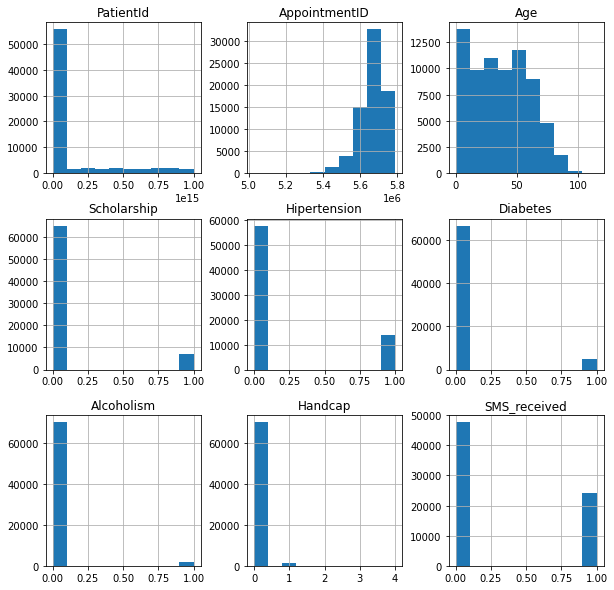

In [14]:
appoinment_df.hist(figsize=(10,10));

In [15]:
# it's not required to have the id of patient and the appointment so we can drop this columns 
appoinment_df.drop(["PatientId","AppointmentID"],axis=1,inplace = True)
appoinment_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
# Let's change the AppointmentDay and ScheduledDay to a date format 
appoinment_df["ScheduledDay"]= pd.to_datetime(appoinment_df['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
appoinment_df["AppointmentDay"]= pd.to_datetime(appoinment_df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')

In [17]:
appoinment_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
# Let's see some statistics on the data that will help us to draw conclusion 
# How many people who attend the appointment and who doesn't attend it 
appoinment_df["No-show"].value_counts()

No     54153
Yes    17663
Name: No-show, dtype: int64

In [19]:
# How many people who have diabetes and who didn't have it 
appoinment_df["Diabetes"].value_counts()

0    66720
1     5096
Name: Diabetes, dtype: int64

In [20]:
# How many people who have a Scholarship and who didn't have it 
appoinment_df["Scholarship"].value_counts()

0    64955
1     6861
Name: Scholarship, dtype: int64

### Let's See The corelations between two columns :

,mean,std
No-show,,
No,37.229166,23.710145
Yes,34.376267,22.192819


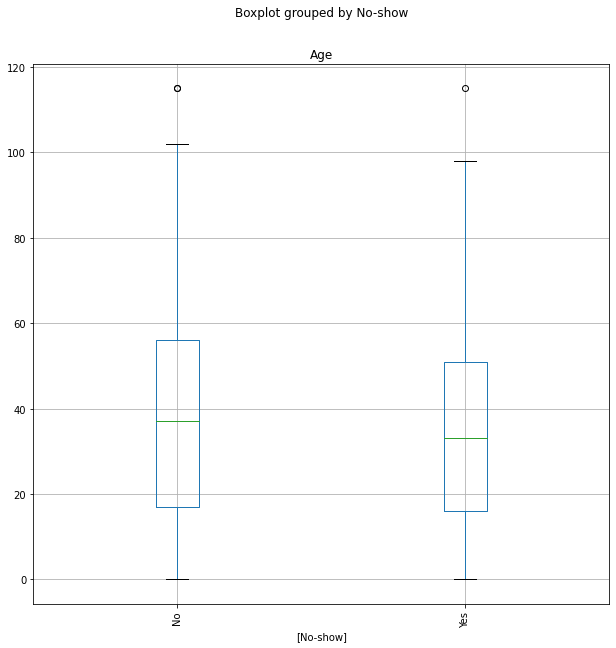

In [59]:
# Let's see the average of ages of people who attend on time and people who didn't attend the appointment

appoinment_df.boxplot(figsize = (10,10),column=["Age"],by =["No-show"],rot=90)
plt.ylabel="Age"
pd.DataFrame(appoinment_df.groupby(["No-show"])["Age"].describe().loc[:,["mean","std"]])

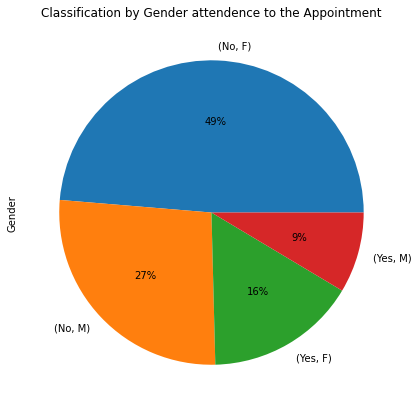

In [49]:
appoinment_df.groupby(["No-show"])["Gender"].value_counts().plot(figsize=(7,7),kind='pie',autopct='%1.0f%%',title='Classification by Gender attendence to the Appointment');

<a id='eda'></a>
## Exploratory Data Analysis

> In this section we will draw conclusion and will answer the questions that have been asked before 


## Research Question 1: Is there a relationship between the Scholarship and no-shows?

> we ask this question to see if people who got Scholarship didn't attend the appointment , and from results we could see that the precentage of people who have Scholarship and didn't attend is greater than who already have and attend 

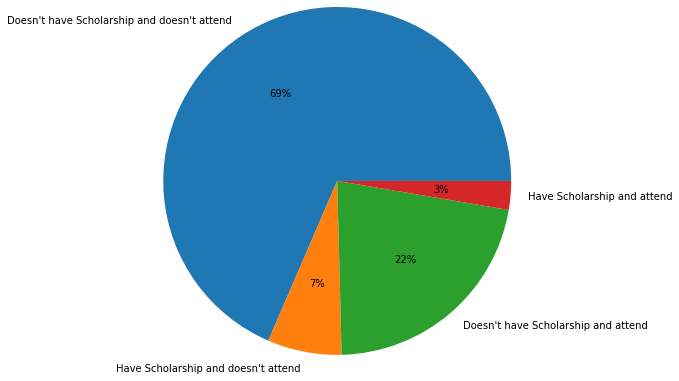

In [122]:
# first we should filtter the data as we need by groubby 
y = appoinment_df.groupby(["No-show"])["Scholarship"].value_counts()
# let's make the labels for the precentages 
label = ["Doesn't have Scholarship and doesn't attend","Have Scholarship and doesn't attend",
         "Doesn't have Scholarship and attend","Have Scholarship and attend"]
# put the title for the plot
plt.title = "Relationship between Scholarship and Attendence "
# drawing the bar 
plt.pie(y,labels=label,autopct='%1.0f%%',radius=2)
plt.figsize = (10,10)
plt.show() 

## Research Question 2: Is there a relationship between the SMS_received and no-shows?
> what about discuss the SMS recived as a reson for attending the appointment , does it really affect the attendace or not ? let's see 

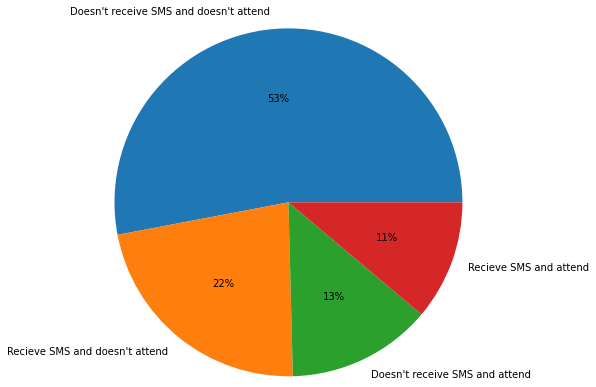

In [126]:
# first we should filtter the data as we need by groubby 
y = appoinment_df.groupby(["No-show"])["SMS_received"].value_counts()
# let's make the labels for the precentages 
label = ["Doesn't receive SMS and doesn't attend","Recieve SMS and doesn't attend",
         "Doesn't receive SMS and attend","Recieve SMS and attend"]
# put the title for the plot
plt.title = "Relationship between SMS_received and Attendence "
# drawing the bar 
plt.pie(y,labels=label,autopct='%1.0f%%',radius=2)
plt.figsize = (10,10)
plt.show() 

<a id='conclusions'></a>
## Conclusions

> After doing some analysis on the data we got that:
the precentage of females who didn't attend the applointment was greater than males 
so , we test another reasons for not attending the appointment , we show the precentage of people who got Scholarship and we got that amount of people who got Scholarship and didn't attend was smaller than people who doesn't have the Scholarship and attend , so "Scholarship" could affect the attendece of people , after anayzing the SMS recived as a reson for attendece we could see that more people who recieve SMS and didn't attend than people who attend , so it could affect the attendace as a reason 





<a id='Limitation'></a>
## Limitation

>I think it would be better if the dataset covers people from differnt countries to show a better results , also it could be better if the dataset covers longer periods of time 